In [1]:
import cv2 #to install open cv, use pip install opencv-python

In [2]:
import matplotlib.pyplot as plt #to install matplot lib, use pip install matplotlib

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels = [] #empty list of python 
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt: 
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ##255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ##mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 0000020427D77670>

## To execute a image use the below commands 

In [11]:
img = cv2.imread('man-bmw.jpg') #to read a image 

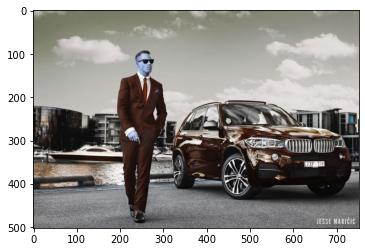

In [12]:
plt.imshow(img)

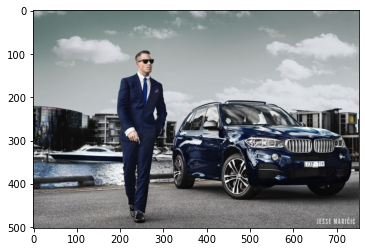

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # to change the color to RGB

In [14]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5) #to specify the labels of class item 

In [15]:
print(ClassIndex)

[3 1]


In [16]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)
    cv2.rectangle(img, boxes, (255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

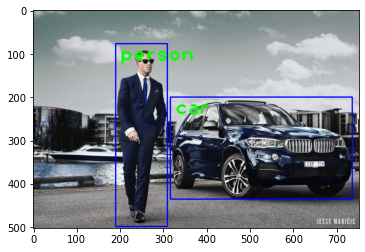

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## For a live webcam demonstrations use the below code:

In [18]:
#For live webcam demonstration 
cap = cv2.VideoCapture(1)

#Check if the webcam is opened correctly or not 
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Unable to open the webcam")
    

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ref, frame = cap.read()
    
    #ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)
    
    cv2.imshow('Object Detection Task',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 84]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
